In [24]:
import os
import uproot
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d, Axes3D

#os.environ["KERAS_BACKEND"] = "plaidml.keras.backend"

from keras.models import Sequential
from keras.layers import Dense

from keras.models import Model
from keras.layers import Dense, Input, Dropout, MaxPooling2D, Flatten
from keras import regularizers
from keras.layers.merge import concatenate

from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

from scipy.stats import ks_2samp

os.chdir('../src/')
import ml_analysis_plotting

The cell below accesses and orients the input arrays correctly

In [25]:
def  get_input_arrays(tree, features_list):
    array = np.transpose(tree.arrays(features_list, outputtype=tuple))
    print(array.shape)
    print(array[0])
    return array

In [26]:
os.chdir('../data')

In [27]:
#tree1 = uproot.open('user.pavol.19077317._000001.reco_copy.root')[b'newtree;1']
#tree2 = uproot.open('spin_data_01.root')[b'spin_truth;1']
#tree1 = uproot.open('user.fisopkov.19389493._000001.reco_copy.root')[b'spin_truth;1']
#tree = uproot.open('full_spin_04_big.root')[b'spin_truth;1']
#tree = uproot.open('full_spin_03_small.root')[b'spin_truth;1']
tree = uproot.open('inputsFeb2020/user.fisopkov.19389493._000197.reco_copy.root')['features']
tree.keys()

[b'top_pt',
 b'top_eta',
 b'top_phi',
 b'tbar_pt',
 b'tbar_eta',
 b'tbar_phi',
 b'lep_t_pt',
 b'lep_t_eta',
 b'lep_t_phi',
 b'lep_tbar_pt',
 b'lep_tbar_eta',
 b'lep_tbar_phi',
 b'nu_top_pt',
 b'nu_top_eta',
 b'nu_top_phi',
 b'nu_tbar_pt',
 b'nu_tbar_eta',
 b'nu_tbar_phi',
 b'b1_pt',
 b'b1_eta',
 b'b1_phi',
 b'b2_pt',
 b'b2_eta',
 b'b2_phi',
 b'ttbar_pt',
 b'ttbar_eta',
 b'ttbar_phi',
 b'top_m',
 b'tbar_m',
 b'lep_top_m',
 b'lep_tbar_m',
 b'nu_top_m',
 b'nu_tbar_m',
 b'b1_m',
 b'b2_m',
 b'ttbar_m',
 b'met',
 b'met_x',
 b'met_y',
 b'reco_top_pt',
 b'reco_top_eta',
 b'reco_top_phi',
 b'reco_tbar_pt',
 b'reco_tbar_eta',
 b'reco_tbar_phi',
 b'reco_top_m',
 b'reco_tbar_m',
 b'reco_lep_1_pt',
 b'reco_lep_1_eta',
 b'reco_lep_1_phi',
 b'reco_lep_2_pt',
 b'reco_lep_2_eta',
 b'reco_lep_2_phi',
 b'reco_lep_1_e',
 b'reco_lep_2_e',
 b'c_nn',
 b'c_rr',
 b'c_kk',
 b'c_rk',
 b'c_kr',
 b'c_nr',
 b'c_rn',
 b'c_nk',
 b'c_kn',
 b'c_nk_p_kn',
 b'c_nr_p_rn',
 b'c_rk_p_kr',
 b'c_nk_m_kn',
 b'c_nr_m_rn',
 b'c_

In [28]:
'''
a = tree1.array(b'kk')
b = tree2.array(b'kk')
c = tree3.array(b'kk')
_=plt.hist(a, bins=40, density=True, histtype='step', linewidth=2., label='1')
plt.legend()
plt.show()
_=plt.hist(b, bins=40, density=True, histtype='step', linewidth=2., label='2')
plt.legend()
plt.show()
_=plt.hist(c, bins=40, density=True, histtype='step', linewidth=2., label='3')
plt.legend()
plt.show()
'''

"\na = tree1.array(b'kk')\nb = tree2.array(b'kk')\nc = tree3.array(b'kk')\n_=plt.hist(a, bins=40, density=True, histtype='step', linewidth=2., label='1')\nplt.legend()\nplt.show()\n_=plt.hist(b, bins=40, density=True, histtype='step', linewidth=2., label='2')\nplt.legend()\nplt.show()\n_=plt.hist(c, bins=40, density=True, histtype='step', linewidth=2., label='3')\nplt.legend()\nplt.show()\n"

In [29]:
'''
fig, ax = plt.subplots(figsize=(20,10))
bins=np.histogram(np.hstack((a,b,c)), bins=40)[1]
_=plt.hist(a, bins, density=True, histtype='step', linewidth=2.)
_=plt.hist(b, bins, density=True, histtype='step', linewidth=2.)
_=plt.hist(c, bins, density=True, histtype='step', linewidth=2.)
'''

"\nfig, ax = plt.subplots(figsize=(20,10))\nbins=np.histogram(np.hstack((a,b,c)), bins=40)[1]\n_=plt.hist(a, bins, density=True, histtype='step', linewidth=2.)\n_=plt.hist(b, bins, density=True, histtype='step', linewidth=2.)\n_=plt.hist(c, bins, density=True, histtype='step', linewidth=2.)\n"

In [30]:
features_list = [
 b'b1_pt',
 b'b1_eta',
 b'b1_phi',
 b'b2_pt',
 b'b2_eta',
 b'b2_phi',
 b'top_eta',
 b'top_phi',
 b'top_pt',
 b'tbar_eta',
 b'tbar_phi',
 b'tbar_pt',
 b'nu_top_eta',
 b'nu_top_phi',
 b'nu_top_pt',
 b'nu_tbar_eta',
 b'nu_tbar_phi',
 b'nu_tbar_pt',
 b'ttbar_pt',
 b'ttbar_eta',
 b'ttbar_phi',
 b'lep_t_eta',
 b'lep_t_phi',
 b'lep_t_pt',
 b'lep_tbar_pt',
 b'lep_tbar_eta',
 b'lep_tbar_phi',
 b'met',
 b'met_x',
 b'met_y',
 b'ttbar_m',
 b'reco_top_pt',
 b'reco_top_eta',
 b'reco_top_phi',
 b'reco_tbar_pt',
 b'reco_tbar_eta',
 b'reco_tbar_phi',
 b'reco_lep_1_pt',
 b'reco_lep_1_eta',
 b'reco_lep_1_phi',
 b'reco_lep_2_pt',
 b'reco_lep_2_eta',
 b'reco_lep_2_phi',
 b'reco_lep_1_e',
 b'reco_lep_2_e',
 b'lep_delta_phi',
 b'lep_delta_eta',
 b'top_delta_phi',
 b'top_delta_eta'
]

[  28.   91.  155.  274.  373.  532.  674.  907. 1168. 1671. 2269. 3447.
 6161. 3566. 2427. 1776. 1343. 1057.  821.  532.  395.  265.  162.   74.
   34.]
[-0.98057781 -0.90218602 -0.82379422 -0.74540242 -0.66701063 -0.58861883
 -0.51022703 -0.43183524 -0.35344344 -0.27505165 -0.19665985 -0.11826805
 -0.03987626  0.03851554  0.11690734  0.19529913  0.27369093  0.35208273
  0.43047452  0.50886632  0.58725811  0.66564991  0.74404171  0.8224335
  0.9008253   0.9792171 ]


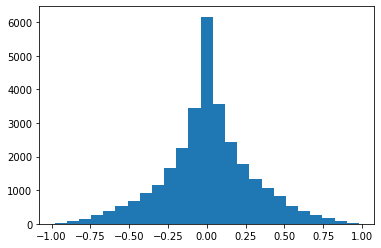

In [31]:

spin_target = tree.array(b'c_kk')#[np.where(spin_target !=  -10.)[0]]
#pt_cut = np.where(spin_target/1000.0 < 300.)[0]
#spin_target = spin_target[pt_cut]
h,b,_=plt.hist(spin_target, bins=25)
print(h)
print(b)

In [32]:
np.where(spin_target ==  -10.)[0]

array([], dtype=int64)

[b'b1_pt', b'b1_eta', b'b1_phi', b'b2_pt', b'b2_eta', b'b2_phi', b'top_eta', b'top_phi', b'top_pt', b'tbar_eta', b'tbar_phi', b'tbar_pt', b'nu_top_eta', b'nu_top_phi', b'nu_top_pt', b'nu_tbar_eta', b'nu_tbar_phi', b'nu_tbar_pt', b'ttbar_pt', b'ttbar_eta', b'ttbar_phi', b'lep_t_eta', b'lep_t_phi', b'lep_t_pt', b'lep_tbar_pt', b'lep_tbar_eta', b'lep_tbar_phi', b'met', b'met_x', b'met_y', b'ttbar_m', b'reco_top_pt', b'reco_top_eta', b'reco_top_phi', b'reco_tbar_pt', b'reco_tbar_eta', b'reco_tbar_phi', b'reco_lep_1_pt', b'reco_lep_1_eta', b'reco_lep_1_phi', b'reco_lep_2_pt', b'reco_lep_2_eta', b'reco_lep_2_phi', b'reco_lep_1_e', b'reco_lep_2_e', b'lep_delta_phi', b'lep_delta_eta', b'top_delta_phi', b'top_delta_eta']
b'b1_pt'


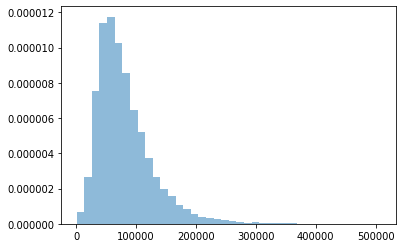

b'b1_eta'


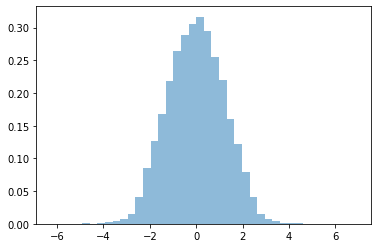

b'b1_phi'


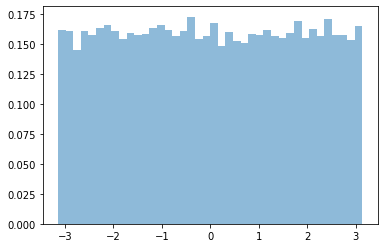

b'b2_pt'


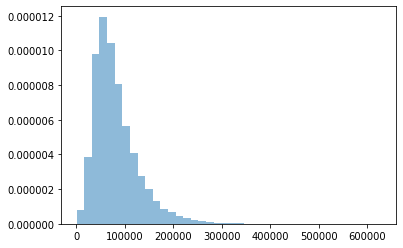

b'b2_eta'


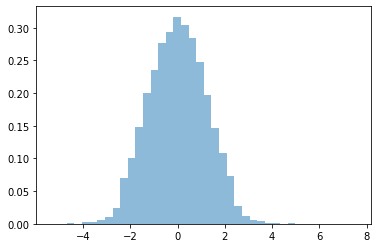

b'b2_phi'


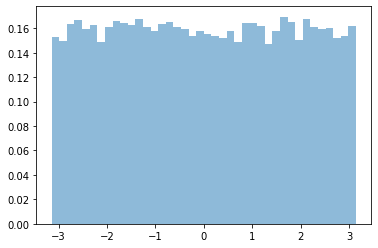

b'top_eta'


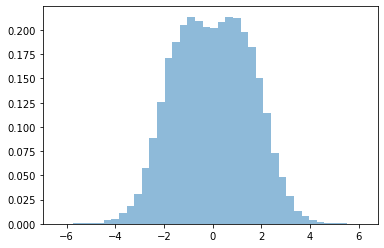

b'top_phi'


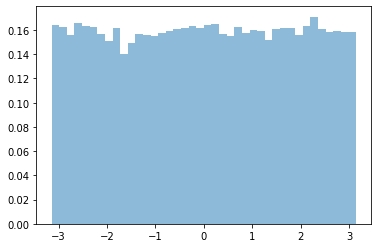

b'top_pt'


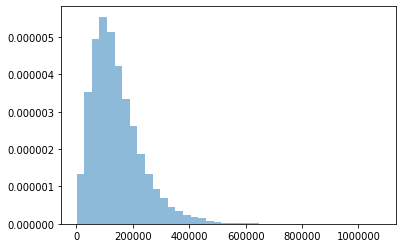

b'tbar_eta'


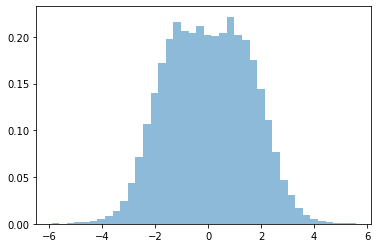

b'tbar_phi'


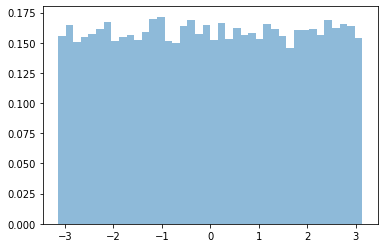

b'tbar_pt'


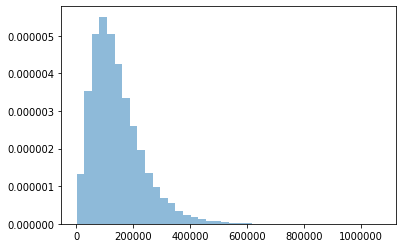

b'nu_top_eta'


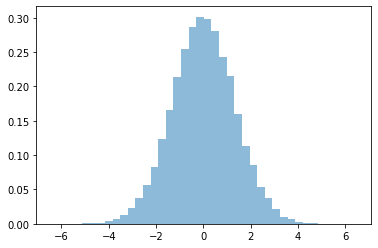

b'nu_top_phi'


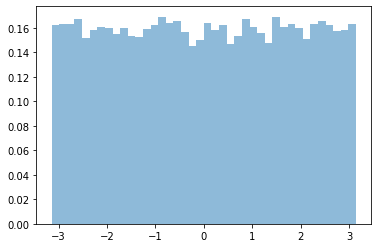

b'nu_top_pt'


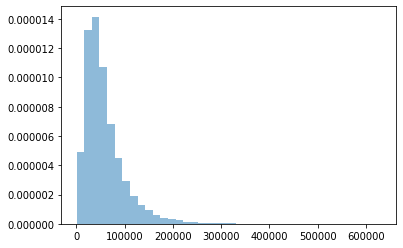

b'nu_tbar_eta'


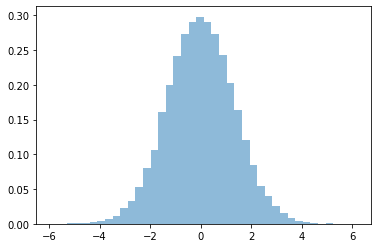

b'nu_tbar_phi'


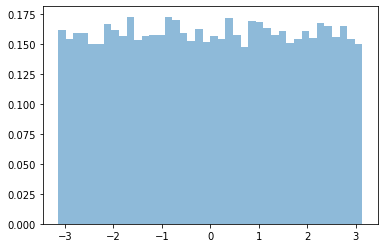

b'nu_tbar_pt'


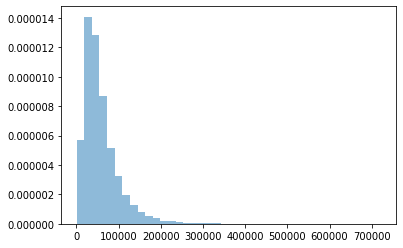

b'ttbar_pt'


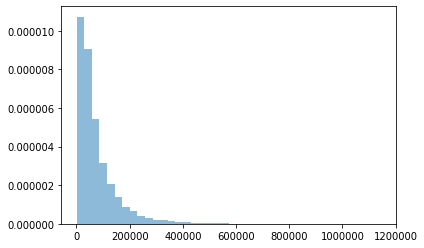

b'ttbar_eta'


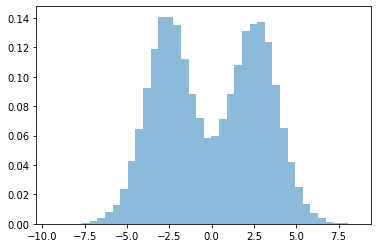

b'ttbar_phi'


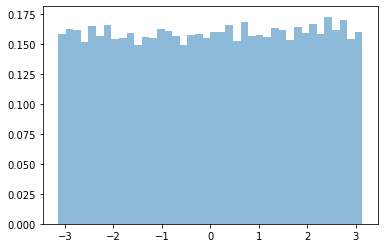

b'lep_t_eta'


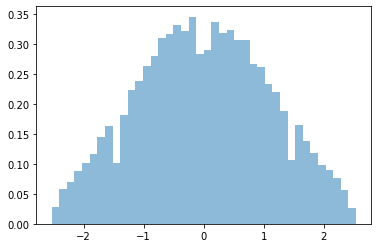

b'lep_t_phi'


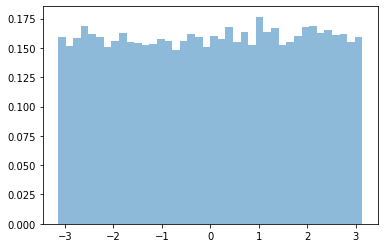

b'lep_t_pt'


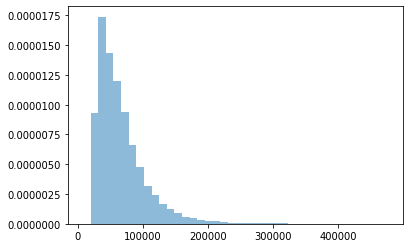

b'lep_tbar_pt'


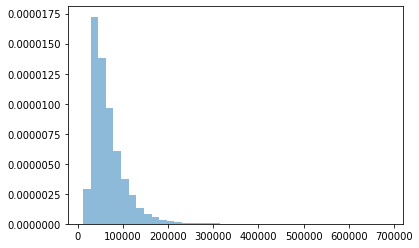

b'lep_tbar_eta'


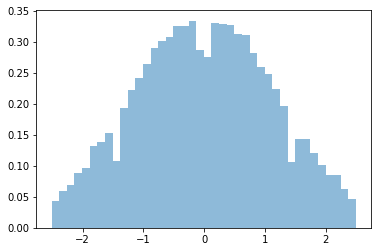

b'lep_tbar_phi'


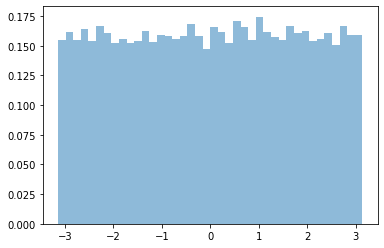

b'met'


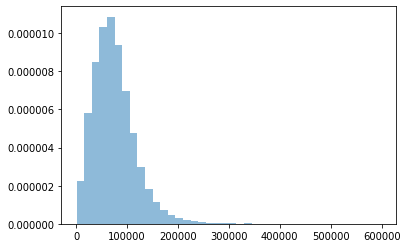

b'met_x'


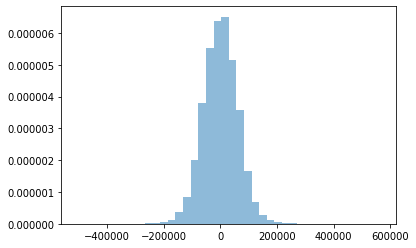

b'met_y'


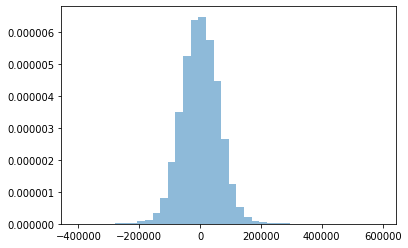

b'ttbar_m'


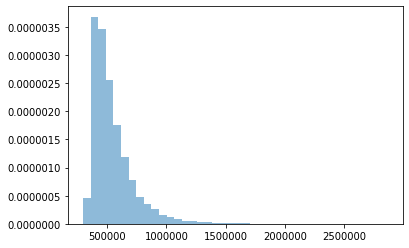

b'reco_top_pt'


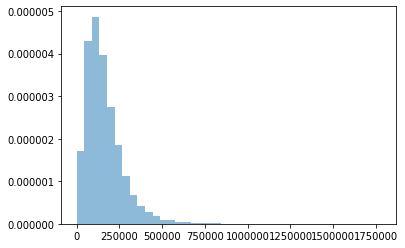

b'reco_top_eta'


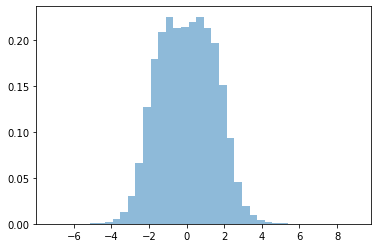

b'reco_top_phi'


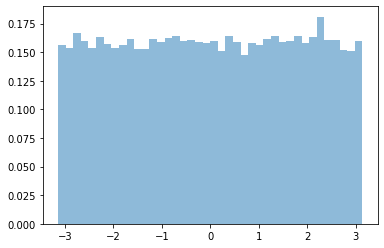

b'reco_tbar_pt'


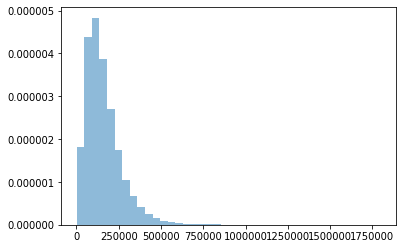

b'reco_tbar_eta'


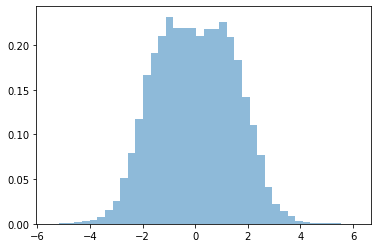

b'reco_tbar_phi'


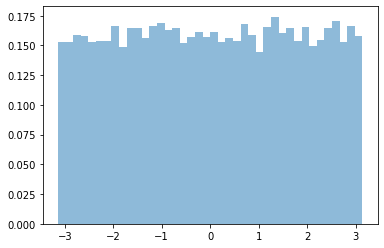

b'reco_lep_1_pt'


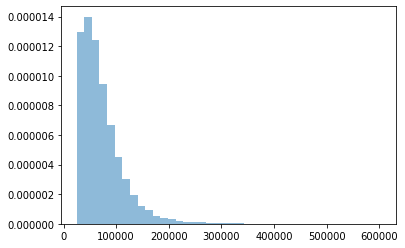

b'reco_lep_1_eta'


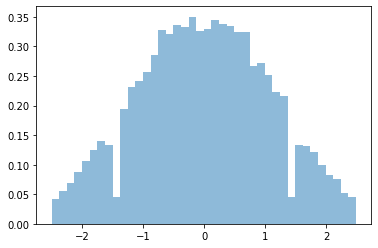

b'reco_lep_1_phi'


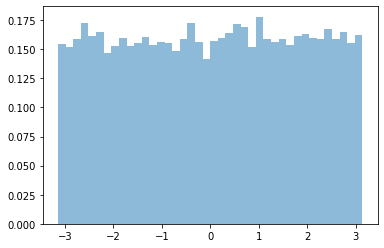

b'reco_lep_2_pt'


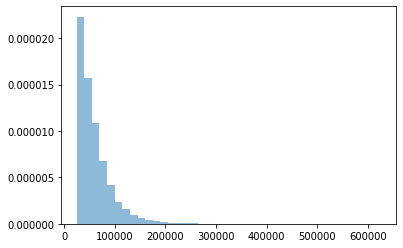

b'reco_lep_2_eta'


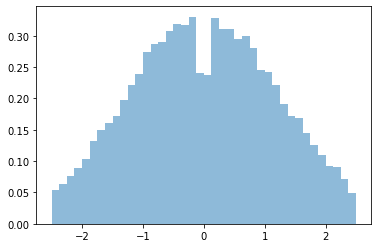

b'reco_lep_2_phi'


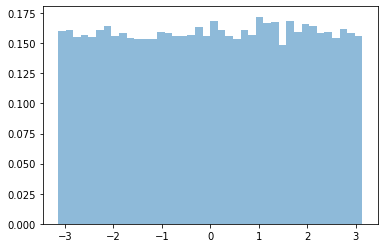

b'reco_lep_1_e'


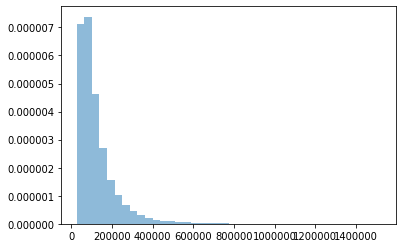

b'reco_lep_2_e'


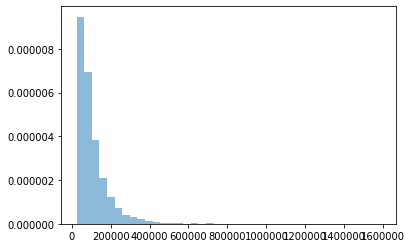

b'lep_delta_phi'


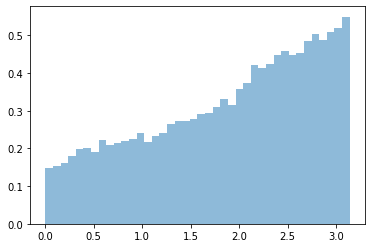

b'lep_delta_eta'


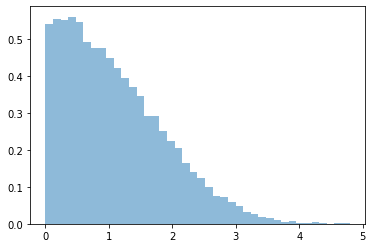

b'top_delta_phi'


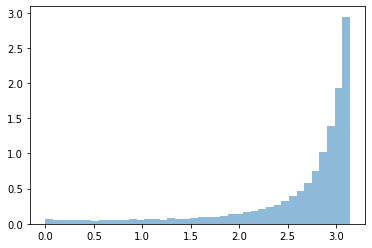

b'top_delta_eta'


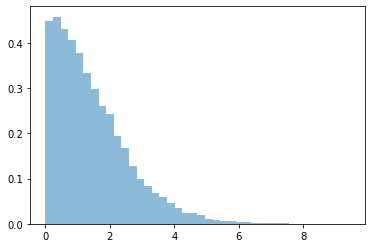

In [33]:
print(features_list)
for feature in features_list:
    print(feature)
    #plt.hist(tree1.array(feature),bins=40,density=True,alpha=.8)
    plt.hist(tree.array(feature),bins=40,density=True,alpha=.5)
    plt.show()

In [34]:
spin_weights = 1/(h * 1/np.max(h))
print(spin_weights)
locs = np.digitize(spin_target, b)
weights_array = np.zeros(len(spin_target))
for i in range(len(spin_weights)):
    weights_array[np.where(locs == i+1)[0]] = spin_weights[i]

[220.03571429  67.7032967   39.7483871   22.48540146  16.51742627
  11.58082707   9.14094955   6.79272326   5.27482877   3.68701376
   2.71529308   1.78735132   1.           1.72770611   2.53852493
   3.46903153   4.58749069   5.82876064   7.50426309  11.58082707
  15.59746835  23.2490566   38.0308642   83.25675676 181.20588235]


### This scales the target in order for the ML to be successful

In [35]:
spin_transformer = RobustScaler()
spin_target_scaled = spin_transformer.fit_transform(spin_target.reshape(-1,1))
spin_target_scaled = (spin_target_scaled - np.min(spin_target_scaled))/(np.max(spin_target_scaled) - np.min(spin_target_scaled))
print(spin_target_scaled.shape)

(30202, 1)


In [36]:
features_array = get_input_arrays(tree, features_list)

(30202, 49)
[ 7.12899766e+04  2.70052731e-01  6.82022870e-02  7.40520391e+04
 -1.24738383e+00 -1.38325799e+00 -5.73696613e-01  7.53871918e-01
  1.33023672e+05 -2.18640256e+00 -2.42842102e+00  9.65060781e+04
  4.93854880e-02  1.20657682e+00  4.51082813e+04 -1.79148638e+00
 -2.59671140e+00  6.39988125e+04  3.68075720e+04 -3.31284164e+00
  8.60758280e-01 -1.55785120e+00  1.35118723e+00  4.50168750e+04
  5.34671875e+04 -1.54263306e+00  2.21386743e+00  3.96912328e+04
 -3.86625938e+04  8.97762814e+03  4.81641769e+05  9.55899609e+04
 -6.48259878e-01  4.17471230e-01  8.76703125e+04 -1.82914186e+00
 -2.80529094e+00  5.22074688e+04 -1.54305112e+00  2.21402788e+00
  4.42484297e+04 -1.55730581e+00  1.35111988e+00  1.27714453e+05
  1.09663594e+05  8.62680197e-01  1.52181387e-02  3.10089237e+00
  1.61270595e+00]


In [37]:
np.where(np.isnan(features_array) == True)

(array([], dtype=int64), array([], dtype=int64))

In [38]:
transformer = RobustScaler()
features_array_scaled = transformer.fit_transform(features_array)
print(features_array_scaled.shape)

(30202, 49)


In [39]:
model = Sequential()
model.add(Dense(200, input_dim=len(features_list), activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(100, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(50, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(25, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

In [40]:
'''
def multihead_model(features_list):

    t_input = Input(shape=(features_list), name="t_input")
    
    nu_input = Input(shape=(features_list), name="nu_input")
    
    t1 = Dense(200, activation="relu")(t_input)
    #x2 = Dropout(0.2)(x2)
    t2 = Dense(100, activation="relu")(t1)
    #x2 = Dropout(0.2)(x2)
    t3 = Dense(50, activation="relu")(t2)
    #x2 = Dropout(0.2)(x2)
    
    nu1 = Dense(200, activation="relu")(nu_input)
    #x2 = Dropout(0.2)(x2)
    nu2 = Dense(100, activation="relu")(nu1)
    #x2 = Dropout(0.2)(x2)
    nu3 = Dense(50, activation="relu")(nu2)
    #x2 = Dropout(0.2)(x2)

    x = concatenate([t3, nu3])

    x = Dense(25, activation="relu")(x)
    #x = Dropout(0.2)(x)
    #x = Dense(32, activation="relu")(x)
    #x = Dropout(0.2)(x)

    output = Dense(1, activation="sigmoid", name="main_output")(x)

    model = Model(inputs=[t_input, nu_input], outputs=output)

    return model
'''

'\ndef multihead_model(features_list):\n\n    t_input = Input(shape=(features_list), name="t_input")\n    \n    nu_input = Input(shape=(features_list), name="nu_input")\n    \n    t1 = Dense(200, activation="relu")(t_input)\n    #x2 = Dropout(0.2)(x2)\n    t2 = Dense(100, activation="relu")(t1)\n    #x2 = Dropout(0.2)(x2)\n    t3 = Dense(50, activation="relu")(t2)\n    #x2 = Dropout(0.2)(x2)\n    \n    nu1 = Dense(200, activation="relu")(nu_input)\n    #x2 = Dropout(0.2)(x2)\n    nu2 = Dense(100, activation="relu")(nu1)\n    #x2 = Dropout(0.2)(x2)\n    nu3 = Dense(50, activation="relu")(nu2)\n    #x2 = Dropout(0.2)(x2)\n\n    x = concatenate([t3, nu3])\n\n    x = Dense(25, activation="relu")(x)\n    #x = Dropout(0.2)(x)\n    #x = Dense(32, activation="relu")(x)\n    #x = Dropout(0.2)(x)\n\n    output = Dense(1, activation="sigmoid", name="main_output")(x)\n\n    model = Model(inputs=[t_input, nu_input], outputs=output)\n\n    return model\n'

In [41]:
#model = multihead_model(features_list)

In [42]:
model.compile(loss='logcosh', optimizer='adam', metrics=['mae', 'mse'])

In [43]:
features_array_scaled, spin_target_scaled = shuffle(features_array_scaled, spin_target_scaled)

In [44]:
X_train, X_test, y_train, y_test, w_train, w_test = train_test_split(features_array_scaled, spin_target_scaled, weights_array, test_size=0.2)

## If you don't redefine/compile/build the model, the weights are 'updated' from the previous training

In [45]:
history = model.fit(X_train, y_train, epochs=300, batch_size=256, verbose=1, validation_split=.2, sample_weight=w_train)
'''
histories = []
for i in range(10):
    print("Epoch: "+str(int(i*50+1)))
    history = model.fit(X_train, y_train, epochs=50, batch_size=10, verbose=2, validation_split=.1)
    print("Evaluating:")
    print(model.evaluate(X_test, y_test))
    histories.append(history.history['loss'])
'''


Train on 19328 samples, validate on 4833 samples
Epoch 1/300
19328/19328 [==============================] - 1s 33us/step - loss: 0.0678 - mae: 0.1259 - mse: 0.0279 - val_loss: 0.0511 - val_mae: 0.1073 - val_mse: 0.0215
Epoch 2/300
19328/19328 [==============================] - 0s 17us/step - loss: 0.0547 - mae: 0.1106 - mse: 0.0223 - val_loss: 0.0510 - val_mae: 0.1072 - val_mse: 0.0214
Epoch 3/300
19328/19328 [==============================] - 0s 17us/step - loss: 0.0526 - mae: 0.1083 - mse: 0.0217 - val_loss: 0.0510 - val_mae: 0.1072 - val_mse: 0.0215
Epoch 4/300
19328/19328 [==============================] - 0s 18us/step - loss: 0.0516 - mae: 0.1078 - mse: 0.0215 - val_loss: 0.0508 - val_mae: 0.1071 - val_mse: 0.0214
Epoch 5/300
19328/19328 [==============================] - 0s 17us/step - loss: 0.0514 - mae: 0.1071 - mse: 0.0213 - val_loss: 0.0504 - val_mae: 0.1068 - val_mse: 0.0212
Epoch 6/300
19328/19328 [==============================] - 0s 17us/step - loss: 0.0513 - mae: 0.1065

19328/19328 [==============================] - 0s 17us/step - loss: 0.0344 - mae: 0.0945 - mse: 0.0156 - val_loss: 0.0369 - val_mae: 0.0939 - val_mse: 0.0156
Epoch 48/300
19328/19328 [==============================] - 0s 16us/step - loss: 0.0349 - mae: 0.0951 - mse: 0.0155 - val_loss: 0.0362 - val_mae: 0.0931 - val_mse: 0.0153
Epoch 49/300
19328/19328 [==============================] - 0s 17us/step - loss: 0.0345 - mae: 0.0943 - mse: 0.0154 - val_loss: 0.0360 - val_mae: 0.0930 - val_mse: 0.0151
Epoch 50/300
19328/19328 [==============================] - 0s 16us/step - loss: 0.0342 - mae: 0.0947 - mse: 0.0154 - val_loss: 0.0365 - val_mae: 0.0938 - val_mse: 0.0154
Epoch 51/300
19328/19328 [==============================] - 0s 16us/step - loss: 0.0336 - mae: 0.0940 - mse: 0.0152 - val_loss: 0.0368 - val_mae: 0.0934 - val_mse: 0.0155
Epoch 52/300
19328/19328 [==============================] - 0s 15us/step - loss: 0.0335 - mae: 0.0942 - mse: 0.0153 - val_loss: 0.0355 - val_mae: 0.0925 - val

Epoch 95/300
19328/19328 [==============================] - 0s 16us/step - loss: 0.0275 - mae: 0.0877 - mse: 0.0132 - val_loss: 0.0317 - val_mae: 0.0867 - val_mse: 0.0133
Epoch 96/300
19328/19328 [==============================] - 0s 16us/step - loss: 0.0277 - mae: 0.0881 - mse: 0.0134 - val_loss: 0.0310 - val_mae: 0.0856 - val_mse: 0.0129
Epoch 97/300
19328/19328 [==============================] - 0s 16us/step - loss: 0.0273 - mae: 0.0883 - mse: 0.0134 - val_loss: 0.0316 - val_mae: 0.0860 - val_mse: 0.0131
Epoch 98/300
19328/19328 [==============================] - 0s 16us/step - loss: 0.0280 - mae: 0.0882 - mse: 0.0134 - val_loss: 0.0308 - val_mae: 0.0851 - val_mse: 0.0128
Epoch 99/300
19328/19328 [==============================] - 0s 14us/step - loss: 0.0277 - mae: 0.0881 - mse: 0.0135 - val_loss: 0.0310 - val_mae: 0.0858 - val_mse: 0.0130
Epoch 100/300
19328/19328 [==============================] - 0s 16us/step - loss: 0.0273 - mae: 0.0880 - mse: 0.0133 - val_loss: 0.0314 - val_mae

Epoch 143/300
19328/19328 [==============================] - 0s 16us/step - loss: 0.0246 - mae: 0.0840 - mse: 0.0123 - val_loss: 0.0292 - val_mae: 0.0832 - val_mse: 0.0123
Epoch 144/300
19328/19328 [==============================] - 0s 16us/step - loss: 0.0245 - mae: 0.0845 - mse: 0.0123 - val_loss: 0.0291 - val_mae: 0.0832 - val_mse: 0.0123
Epoch 145/300
19328/19328 [==============================] - 0s 16us/step - loss: 0.0251 - mae: 0.0847 - mse: 0.0124 - val_loss: 0.0302 - val_mae: 0.0847 - val_mse: 0.0128
Epoch 146/300
19328/19328 [==============================] - 0s 14us/step - loss: 0.0245 - mae: 0.0838 - mse: 0.0121 - val_loss: 0.0293 - val_mae: 0.0838 - val_mse: 0.0125
Epoch 147/300
19328/19328 [==============================] - 0s 15us/step - loss: 0.0250 - mae: 0.0847 - mse: 0.0125 - val_loss: 0.0298 - val_mae: 0.0842 - val_mse: 0.0127
Epoch 148/300
19328/19328 [==============================] - 0s 14us/step - loss: 0.0244 - mae: 0.0840 - mse: 0.0122 - val_loss: 0.0287 - va

19328/19328 [==============================] - 0s 17us/step - loss: 0.0231 - mae: 0.0819 - mse: 0.0116 - val_loss: 0.0283 - val_mae: 0.0821 - val_mse: 0.0119
Epoch 191/300
19328/19328 [==============================] - 0s 17us/step - loss: 0.0228 - mae: 0.0819 - mse: 0.0116 - val_loss: 0.0283 - val_mae: 0.0817 - val_mse: 0.0119
Epoch 192/300
19328/19328 [==============================] - 0s 17us/step - loss: 0.0224 - mae: 0.0814 - mse: 0.0116 - val_loss: 0.0282 - val_mae: 0.0812 - val_mse: 0.0118
Epoch 193/300
19328/19328 [==============================] - 0s 17us/step - loss: 0.0224 - mae: 0.0813 - mse: 0.0115 - val_loss: 0.0285 - val_mae: 0.0817 - val_mse: 0.0120
Epoch 194/300
19328/19328 [==============================] - 0s 17us/step - loss: 0.0229 - mae: 0.0815 - mse: 0.0115 - val_loss: 0.0289 - val_mae: 0.0825 - val_mse: 0.0121
Epoch 195/300
19328/19328 [==============================] - 0s 17us/step - loss: 0.0223 - mae: 0.0813 - mse: 0.0115 - val_loss: 0.0284 - val_mae: 0.0818 

Epoch 238/300
19328/19328 [==============================] - 1s 29us/step - loss: 0.0221 - mae: 0.0807 - mse: 0.0113 - val_loss: 0.0271 - val_mae: 0.0810 - val_mse: 0.0115
Epoch 239/300
19328/19328 [==============================] - 0s 20us/step - loss: 0.0219 - mae: 0.0806 - mse: 0.0113 - val_loss: 0.0278 - val_mae: 0.0811 - val_mse: 0.0118
Epoch 240/300
19328/19328 [==============================] - 0s 17us/step - loss: 0.0219 - mae: 0.0805 - mse: 0.0113 - val_loss: 0.0276 - val_mae: 0.0811 - val_mse: 0.0117
Epoch 241/300
19328/19328 [==============================] - 0s 17us/step - loss: 0.0219 - mae: 0.0803 - mse: 0.0112 - val_loss: 0.0268 - val_mae: 0.0801 - val_mse: 0.0114
Epoch 242/300
19328/19328 [==============================] - 0s 17us/step - loss: 0.0219 - mae: 0.0807 - mse: 0.0114 - val_loss: 0.0275 - val_mae: 0.0811 - val_mse: 0.0117
Epoch 243/300
19328/19328 [==============================] - 0s 17us/step - loss: 0.0218 - mae: 0.0802 - mse: 0.0112 - val_loss: 0.0279 - va

19328/19328 [==============================] - 0s 22us/step - loss: 0.0213 - mae: 0.0795 - mse: 0.0111 - val_loss: 0.0271 - val_mae: 0.0811 - val_mse: 0.0116
Epoch 286/300
19328/19328 [==============================] - 0s 17us/step - loss: 0.0215 - mae: 0.0796 - mse: 0.0110 - val_loss: 0.0269 - val_mae: 0.0806 - val_mse: 0.0115
Epoch 287/300
19328/19328 [==============================] - 0s 18us/step - loss: 0.0209 - mae: 0.0797 - mse: 0.0111 - val_loss: 0.0275 - val_mae: 0.0811 - val_mse: 0.0118
Epoch 288/300
19328/19328 [==============================] - 0s 16us/step - loss: 0.0212 - mae: 0.0792 - mse: 0.0110 - val_loss: 0.0266 - val_mae: 0.0801 - val_mse: 0.0114
Epoch 289/300
19328/19328 [==============================] - 0s 16us/step - loss: 0.0220 - mae: 0.0795 - mse: 0.0110 - val_loss: 0.0266 - val_mae: 0.0803 - val_mse: 0.0114
Epoch 290/300
19328/19328 [==============================] - 0s 17us/step - loss: 0.0206 - mae: 0.0789 - mse: 0.0108 - val_loss: 0.0272 - val_mae: 0.0805 

'\nhistories = []\nfor i in range(10):\n    print("Epoch: "+str(int(i*50+1)))\n    history = model.fit(X_train, y_train, epochs=50, batch_size=10, verbose=2, validation_split=.1)\n    print("Evaluating:")\n    print(model.evaluate(X_test, y_test))\n    histories.append(history.history[\'loss\'])\n'

In [46]:
model.save_weights('model_weights.h5')

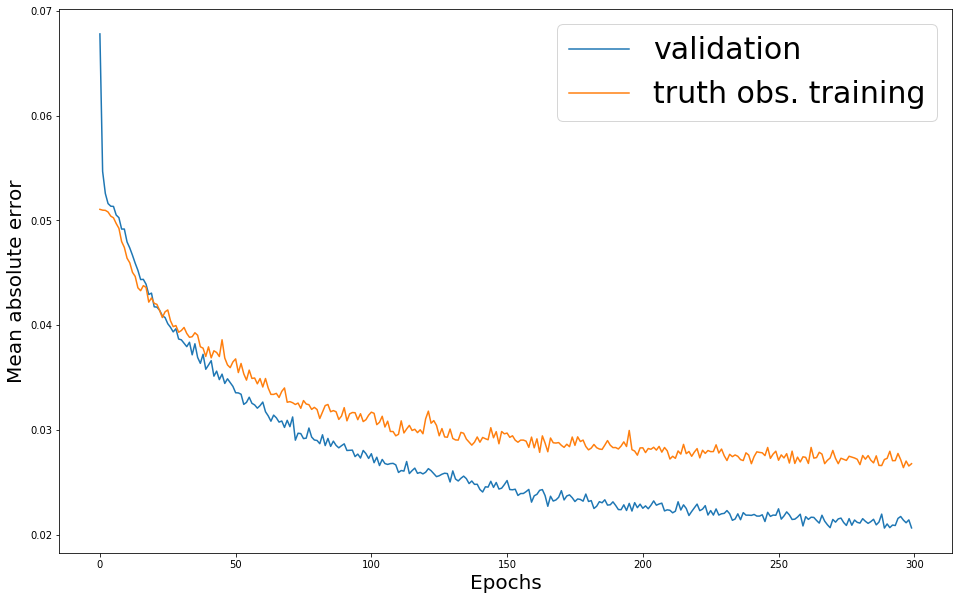

In [47]:
fig, ax = plt.subplots(figsize=(16, 10))
'''
for i in range(1):
    plt.scatter(range(len(histories[i])), histories[i])
'''
#history_hist = plt.hist(history.history['loss'], bins=50)
plt.plot(range(len(history.history['loss'])), history.history['loss'], label='validation')
plt.plot(range(len(history.history['val_loss'])), history.history['val_loss'], label='truth obs. training')
plt.legend(fontsize=30)
plt.xlabel('Epochs', fontsize=20)
plt.ylabel('Mean absolute error', fontsize=20)
plt.savefig('truth_obs_mae')
plt.show()

In [48]:
y_pred = model.predict(X_test)
print(model.evaluate(X_test, y_test))

6041/6041 [==============================] - 0s 22us/step
[0.0057130913094285505, 0.08007071912288666, 0.011514241807162762]


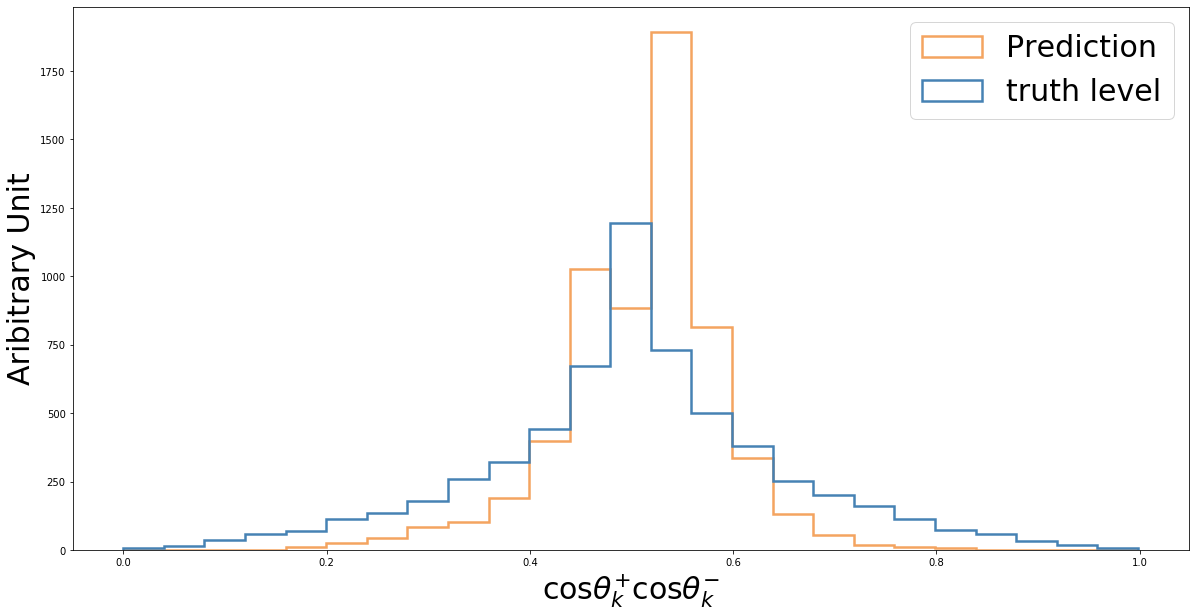

In [49]:
fig, ax = plt.subplots(figsize=(20,10))
a = y_pred
b = y_test
bins=np.histogram(np.hstack((a,b)), bins=25)[1]
h1,b1,_=plt.hist(a, bins, histtype='step', linewidth=2.5, label='Prediction', color='sandybrown')
h2,b2,_=plt.hist(b, bins, histtype='step', linewidth=2.5, label='truth level', color='steelblue')
plt.legend(fontsize=30)
plt.xlabel(r'cos$\theta_{k}^{+}$cos$\theta_{k}^{-}$', fontsize=30)
plt.ylabel('Aribitrary Unit', fontsize=30)
plt.savefig('truth_obs_pred')
plt.show()

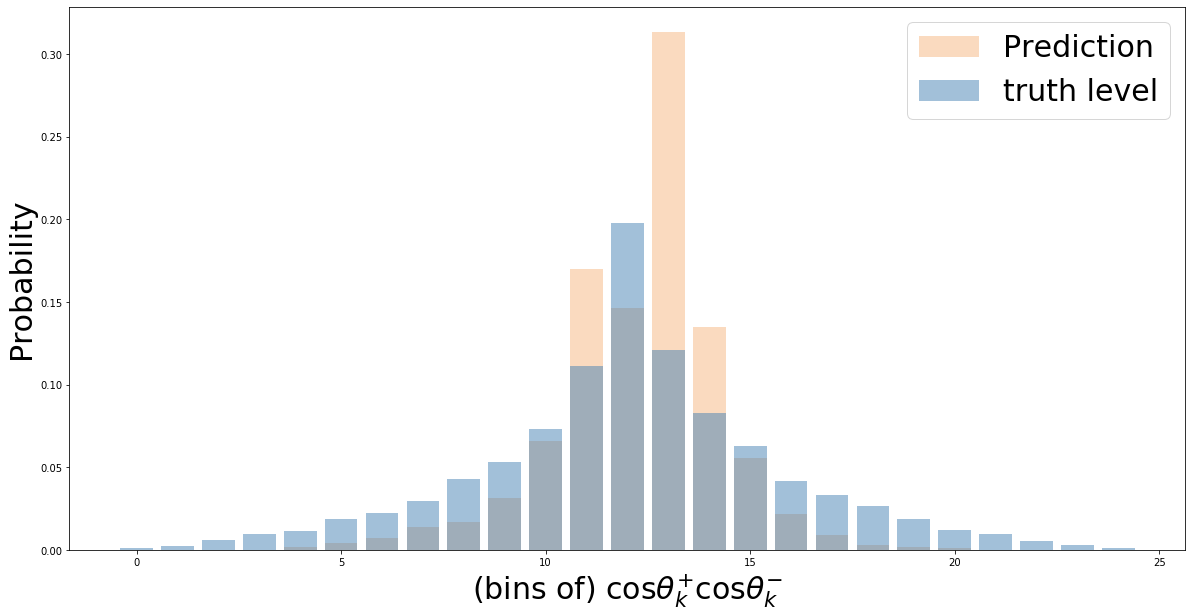

In [50]:
fig, ax = plt.subplots(figsize=(20,10))
plt.bar(range(len(h1)),h1/len(a),alpha=.4, color='sandybrown', label='Prediction')
plt.bar(range(len(h2)),h2/len(b),alpha=.5, color='steelblue', label='truth level')
plt.legend(fontsize=30)
plt.xlabel(r'(bins of) cos$\theta_{k}^{+}$cos$\theta_{k}^{-}$', fontsize=30)
plt.ylabel('Probability', fontsize=30)
plt.savefig('truth_obs_prob')
plt.show()

In [38]:
class make_hist_dicts:

    def correct_compare_hist(self,
        array1, array2, nBins=40, normed=False, gauss=False, logY=False
    ):
        array1_dict = {"hist":None, "binx":None, "weights":None, "binDx":None}
        array2_dict = {"hist":None, "binx":None, "weights":None, "binDx":None}

        array1 = self.removeNan(array1)
        array2 = self.removeNan(array2)

        if gauss is True:
            ratio = guassian_comparison_ratio(array1, array2, nBins)
        else:
            ratio = np.ones(nBins)
        
        hist1, bins1, hist2, bins2 = self.get_hists(array2, array1, nBins)
        
        stat = np.round(ks_2samp(plt.hist(array1, bins=nBins)[0], plt.hist(array2, bins=nBins)[0]), 4)
        plt.close()
        b1 = np.zeros(len(hist1))
        w1 = np.zeros(len(hist1))
        for i in range(len(hist1)):
            b1[i] = (bins1[i + 1] + bins1[i]) / 2
            w1[i] = bins1[i + 1] - bins1[i]
        b2 = b1
        w2 = w1
        
        array1_dict["binDx"] = w1
        array2_dict["binDx"] = w2
        
        array1_dict["hist"] = hist1
        array2_dict["hist"] = hist2
        
        array1_dict["binx"] = b1
        array2_dict["binx"] = b2
        
        hist1 = np.multiply(hist1, ratio)
        hist2 = np.multiply(hist2, ratio)

        weights1 = self.get_weights(array1, bins1, ratio)
        weights2 = self.get_weights(array2, bins2, ratio)
        
        array1_dict["weights"] = weights1
        array2_dict["weights"] = weights2

        if normed is False:
            scale1 = np.maximum(np.max(hist1), np.max(hist2))
            scale2 = scale1
        else:
            scale1 = np.max(hist1)
            scale2 = np.max(hist2)
        
        #error = hist2/len(array2)
        error = 1./hist2    
        fig, ax = plt.subplots(figsize=(16, 10))
        plt.cla()
        if logY is True:
            ax.set_yscale("log")
        ax.set_title("Regression Analysis - model 3, Batches", fontsize=35)
        ax.set_xlabel("kk", fontsize=24)
        ax.set_ylabel("Arbitraty Units", fontsize=24)
        plt.bar(b1, hist1 / scale1, width=w1, alpha=0.2, color="blue", label="Truth")
        plt.bar(b2, hist2 / scale2, width=w2, yerr=error, alpha=0.2, color="red", label="Prediction")
        plt.bar(
            b1,
            hist1 / scale1,
            width=w1,
            alpha=1.0,
            color="none",
            edgecolor="blue",
            linewidth=2.0,
        )
        plt.bar(
            b2,
            hist2 / scale2,
            width=w2,
            alpha=1.0,
            color="none",
            edgecolor="red",
            linewidth=2.0,
        )
        plt.annotate("Kolmogorov–Smirnov", (.7,.94), fontsize=24)
        plt.annotate("Statistic: "+str(stat[0]), (.75,.87), fontsize=24)
        plt.annotate("P-value: "+str(stat[1]), (.75,.80), fontsize=24)
        plt.legend(fontsize=24)
        plt.ylim(0,1.2)
        plt.show()
        
        return array1_dict, array2_dict, ratio

    def removeNan(self,array):
        if len(np.where(np.isnan(array) is True)) == 0:
            pass
        return array[np.logical_not(np.isnan(array))]

    def get_hists(self, array1, array2, nBins):

        """
        array1 = (
            2 * (array1 - np.min(array1)) / (np.max(array1) - np.min(array1)) - 1
        )
        array2 = (
            2 * (array2 - np.min(array2)) / (np.max(array2) - np.min(array2)) - 1
        )
        """

        hist1, bins1, _ = plt.hist(
            array2, color="blue", alpha=0.2, bins=nBins
        )  # , weights=true_z_w)
        plt.close()
        bins2 = bins1
        hist2 = np.zeros(len(hist1))

        # z_reg = np.multiply(test_z_torch.data.numpy().reshape(1000), test_z_w)
        # z_reg = test_z_torch.data.numpy().reshape(len(true_z))
        # z_reg = test_z_torch

        for i in range(len(hist1)):
            hist2[i] = len(
                np.where(array1[np.where((array1 <= bins1[i + 1]))[0]] > bins1[i])[0]
            )  # & (z_reg > bins1[i])[0])]))
            if i == len(hist1):
                hist2[i] = len(np.where(array1 >= bins1[i])[0])
        return hist1, bins1, hist2, bins2

    def get_weights(self, array, bins, ratio):

        weights = np.zeros(len(array))
        bins = np.digitize(array, bins)

        for i in range(len(ratio)):
            weights[np.where(bins == i)] = ratio[i]

        return weights

/Users/blakeforland/.local/share/virtualenvs/spinformation-HNa3-Rh0/lib/python3.6/site-packages/ipykernel_launcher.py:55: RuntimeWarning: divide by zero encountered in true_divide


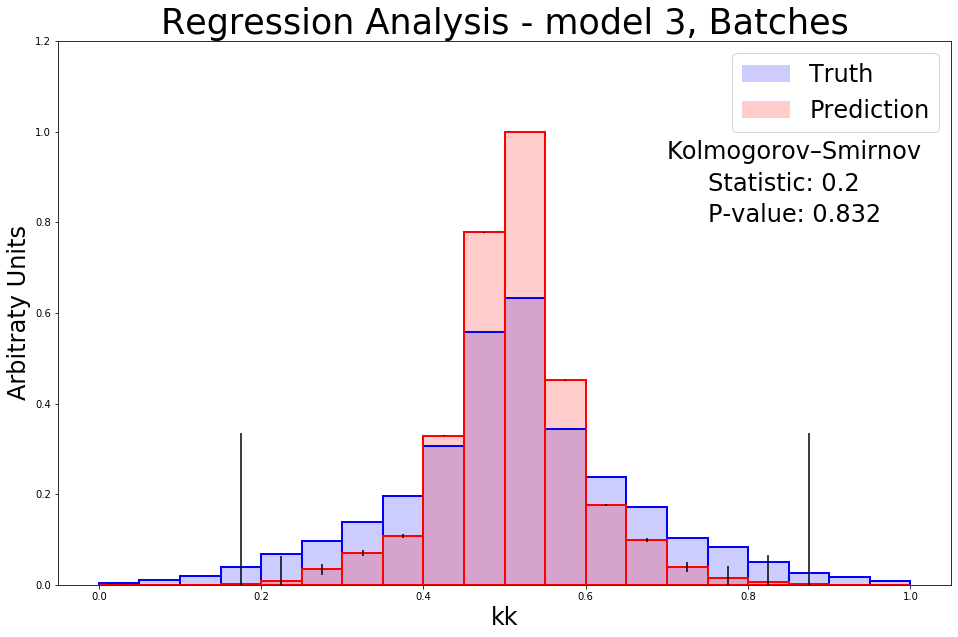

In [60]:
y_y = spin_transformer.fit_transform(y_test.reshape(-1,1))
y_y = (y_y - np.min(y_y))/(np.max(y_y) - np.min(y_y))
comp = make_hist_dicts()
hist1, hist2, ratio = comp.correct_compare_hist(y_y, y_pred, nBins=20)